In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing


In [4]:
#loading csv to pandas data frame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print first 5 rows in the data set .head() helps to print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#printing the last 5 rows of the data set .tail() helps to print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#no fo rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting their data types in the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
#getting the statistical measures of the data, the below are not percentages but percentile
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation
1.positive-directly proportional
2.negative-inversly proportional

In [13]:
correlation = gold_data.drop('Date', axis=1).corr()

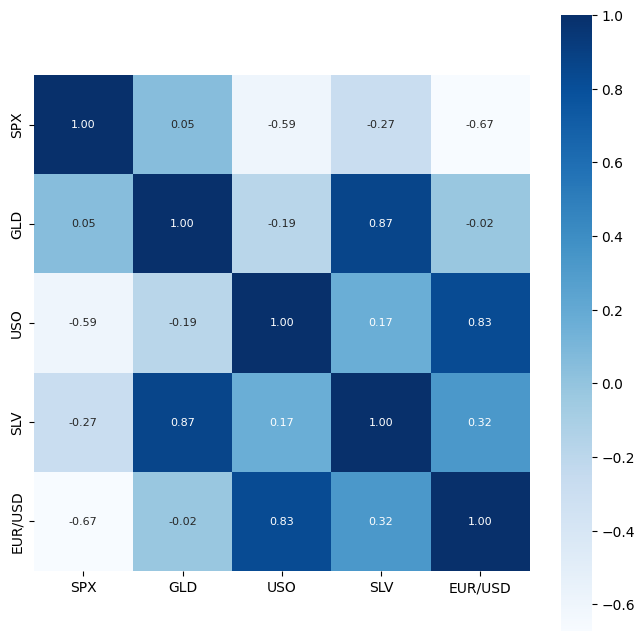

In [16]:
#generate a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [17]:
#correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-18-3215906245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

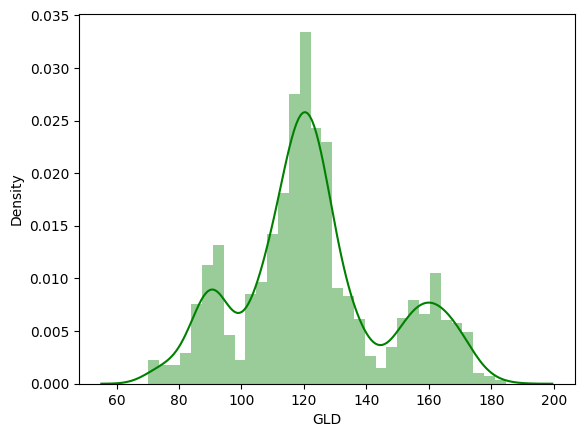

In [18]:
# check the distribution of the gld price
sns.distplot(gold_data['GLD'], color='green')

splitting the features and the target


In [19]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [20]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into test and train data


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model training : Random forest regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#train the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

model evaluation

In [24]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.18179922  82.08679971 116.06970013 127.61280072 120.57620139
 154.77259764 150.11119836 126.07170001 117.58619873 126.01860066
 116.63370082 171.90900084 141.77209888 167.60869884 114.97969985
 117.60540032 140.54800262 170.29130118 159.60280286 158.93609959
 155.16360041 125.20750012 177.17659873 157.01820271 125.14130046
  93.77589966  77.73929995 120.58440028 119.07129944 167.51949963
  88.10930037 125.03180014  91.19560075 117.75270011 121.15089965
 136.64260074 115.59540102 115.48290078 147.66949984 106.98320045
 104.14770217  87.16749791 126.48340089 117.99860005 152.92709903
 119.62690002 108.31370002 108.13119832  93.07830032 126.95959827
  74.7727007  113.66119927 121.38890001 111.29049871 118.86389899
 120.54369972 158.9414997  168.19190108 147.26199735  85.86869854
  94.27000043  86.94579881  90.42270027 119.00530069 126.42770062
 127.66050015 169.65090034 122.35229907 117.41729864  98.34390019
 168.41280096 143.27259844 131.83060331 121.15270213 120.89899923
 119.50630

In [26]:
from logging import error
#compare the pred with actual
#use r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889004033101725


In [27]:
#comare the ytest and testdatapred with plotting a graph
Y_test = list(Y_test)

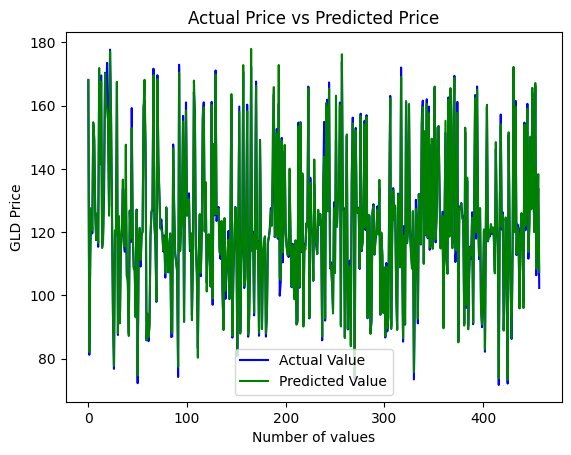

In [29]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()